<div>
<img src="https://i.ibb.co/v3CvVz9/udd-short.png" width="150"/>
    
</div>



# Machine Learning: Laboratorio 02

<br>
    <strong>Universidad del Desarrollo</strong><br>
    <em>Profesor: Tomás Fontecilla </em><br>
    
**Nombre Estudiante(s)**:  
- Kurt Castro
- Cristhian Solís
- Sofia Vits 


### Objetivo:
En este laboratorio se utilizan algoritmos no supervisados de Machine Learning (KMeans, Clustering Jerárquico y Gaussian Mixtures), con la primicia de analizar una imagen mediante la segmentación de colores, para lograr la reducción en escalas de colores predominantes y reconstruir la imagen resultante, iterando para determinar cuál de los algoritmos  es más eficiente para lograr este objetivo.


### Marco metodológico

En el marco de este laboratorio, se desarrollaron actividades secuenciales que determinaron el marco metodológico guiando el desarrollo del laboratorio:
1. Selección grupal de la imagen
2. Importación de librerías
3. Carga de la imagen en formato .PNG
4. Transformación de imagen a arreglo 
5. Implementación de algoritmos no supervisados (KMeans - Clustering Jerárquico - Mezcla de Gaussianas)  
    5.1 Determinación de hiperparametros  
    5.2 Recontrucción de imagen
6. Conclusiones

### Desarrollo
En los siguientes bloques de codigos se implementan los pasos mencionados en el marco metodológico para el desarrollo del laboratio N2

In [245]:
# Importación de las librerías necesarias
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from skimage import io
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import MiniBatchKMeans
from skimage.color import rgb2lab, lab2rgb
from sklearn.metrics import pairwise_distances_argmin


In [246]:
# Modificación de formato original a .png
jpg_image_path = '..\\Imagen\\cantera.jpg'
jpg_image = Image.open(jpg_image_path)
png_image_path = '..\\Imagen\\cantera.png'
jpg_image.save(png_image_path, 'PNG')

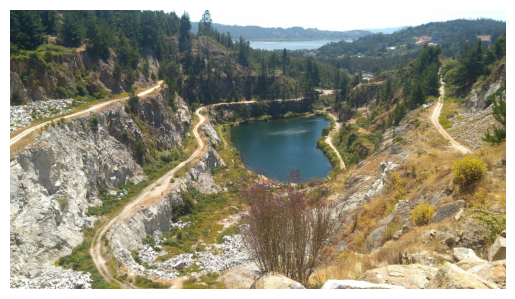

In [247]:
# Carga de la imagen .png
image = io.imread('..\\Imagen\\cantera.png')  
plt.imshow(image)
plt.axis('off')
plt.show()

In [248]:
# Tamaño imagen original
image = np.array(image, dtype=np.float64) / 255
rows, cols, dim = image.shape
print(f"Tamaño de la imagen: {image.shape}")

Tamaño de la imagen: (1310, 2327, 3)


In [249]:
# Transformación a arreglo por pixeles y reorganización del arreglo
imagen_array = image.reshape(-1,3)
pixels = imagen_array
print(f"Nuevo tamaño de la imagen: {pixels.shape}")
print("Valores de los píxeles:", pixels[:5]) 


Nuevo tamaño de la imagen: (3048370, 3)
Valores de los píxeles: [[0.18823529 0.24705882 0.22745098]
 [0.16470588 0.22352941 0.19607843]
 [0.14901961 0.20784314 0.18039216]
 [0.25490196 0.31764706 0.27843137]
 [0.24705882 0.30196078 0.25098039]]


En este punto se finaliza la carga de la imagen, desde una imagen .JPG transformada a .PNG y convertida  en un array 2D donde cada fila representa un píxel y cada columna representa un componente del color, donde la escala esta normalizada para asegurar un calculo optimo de distancias

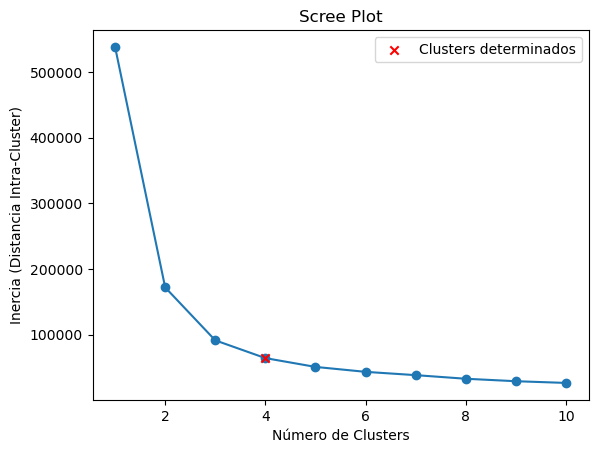

In [250]:
# Determinación de cantidad de clusters para KMeans
inertia = []
clusters_range = range(1,11)
for n_clusters in clusters_range:
    kmeans = KMeans(n_clusters=n_clusters, init="k-means++", max_iter=300)
    kmeans.fit(pixels)
    inertia.append(kmeans.inertia_)

plt.plot(clusters_range, inertia, marker='o')
plt.scatter(4, inertia[3], color='red', label='Clusters determinados', zorder=5, marker='x')  
plt.xlabel('Número de Clusters')
plt.ylabel('Inercia (Distancia Intra-Cluster)')
plt.title('Scree Plot')
plt.legend()
plt.show()

Valores de la paleta: [[0.93723997 0.91884348 0.85907884]
 [0.47033089 0.45002697 0.3444252 ]
 [0.24781122 0.2727573  0.24003133]
 [0.70811342 0.64810971 0.5232715 ]]


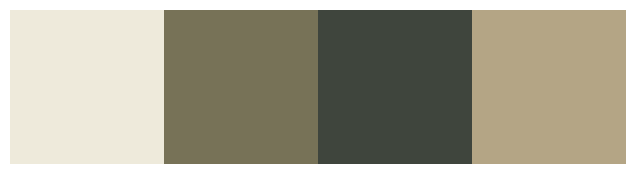

In [251]:
# Paleta resultante de KMeans
num_clusters = 4  
kmeans = KMeans(n_clusters=num_clusters)
kmeans.fit(pixels)
labels = kmeans.predict(pixels)
palette = kmeans.cluster_centers_
print("Valores de la paleta:", palette)
def plot_palette(palette):
    plt.figure(figsize=(8, 2))
    plt.imshow([palette])
    plt.axis('off')
    plt.show()

plot_palette(palette)


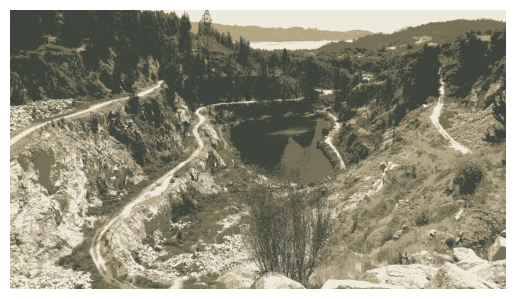

In [252]:
# Recontrucción de imagen con KMeans
Kmeans_palette = palette[labels]
Kmeans_imagen = Kmeans_palette.reshape((rows, cols, dim))

plt.imshow(Kmeans_imagen)
plt.axis('off')
plt.show()


Tamaño de la imagen de clusters: (1310, 2327)


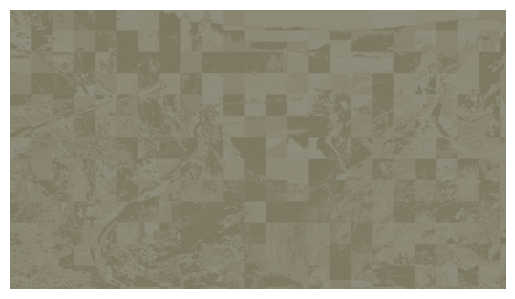

In [253]:
# Clustering Jerarquico

# Procesamiento de la imagen por bloques
block_size = 100  
clusters = np.zeros((rows * cols,), dtype=int)
for i in range(0, rows, block_size):
    for j in range(0, cols, block_size):
        block_rows = min(block_size, rows - i)
        block_cols = min(block_size, cols - j)
        block_indices = []
        for r in range(block_rows):
            for c in range(block_cols):
                block_indices.append((i + r) * cols + (j + c))
        
        block_pixels = pixels[block_indices]
        hc = AgglomerativeClustering(n_clusters=4, metric='euclidean', linkage='average')
        block_clusters = hc.fit_predict(block_pixels)
        
        # Reasignar los clusters al bloque correspondiente
        for idx, cluster in zip(block_indices, block_clusters):
            clusters[idx] = cluster

# Reshape de los clusters para que coincidan con la imagen original
clusters_image = clusters.reshape(rows, cols)
print(f"Tamaño de la imagen de clusters: {clusters_image.shape}")

# Crear una paleta de colores basada en los colores originales de los clusters
palette = np.zeros((4, 3))
for k in range(4):
    palette[k, :] = np.mean(pixels[clusters == k], axis=0)

# Asignar colores a los píxeles
clustered_pixels = palette[clusters]
cluster_jeraquico_imagen = clustered_pixels.reshape((rows, cols, dim))

# Mostrar la imagen reconstruida
plt.imshow(cluster_jeraquico_imagen)
plt.axis('off')
plt.show()

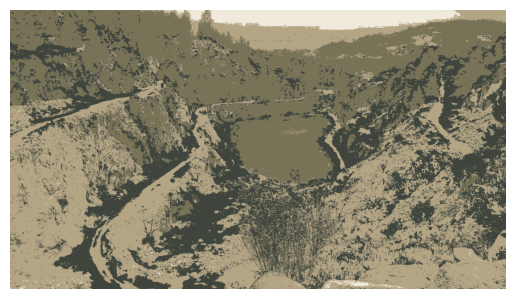

In [243]:
# Modelo de mezclas gaussianas
gmm = GaussianMixture(n_components=num_clusters)
gmm.fit(imagen_array)
gmm_labels = gmm.predict(imagen_array)

# Reconstruir la imagen usando GMM
gmm_imagen = palette[gmm_labels].reshape((rows, cols, dim))

# Mostrar la imagen reconstruida
plt.imshow(gmm_imagen)
plt.axis('off')
plt.show()

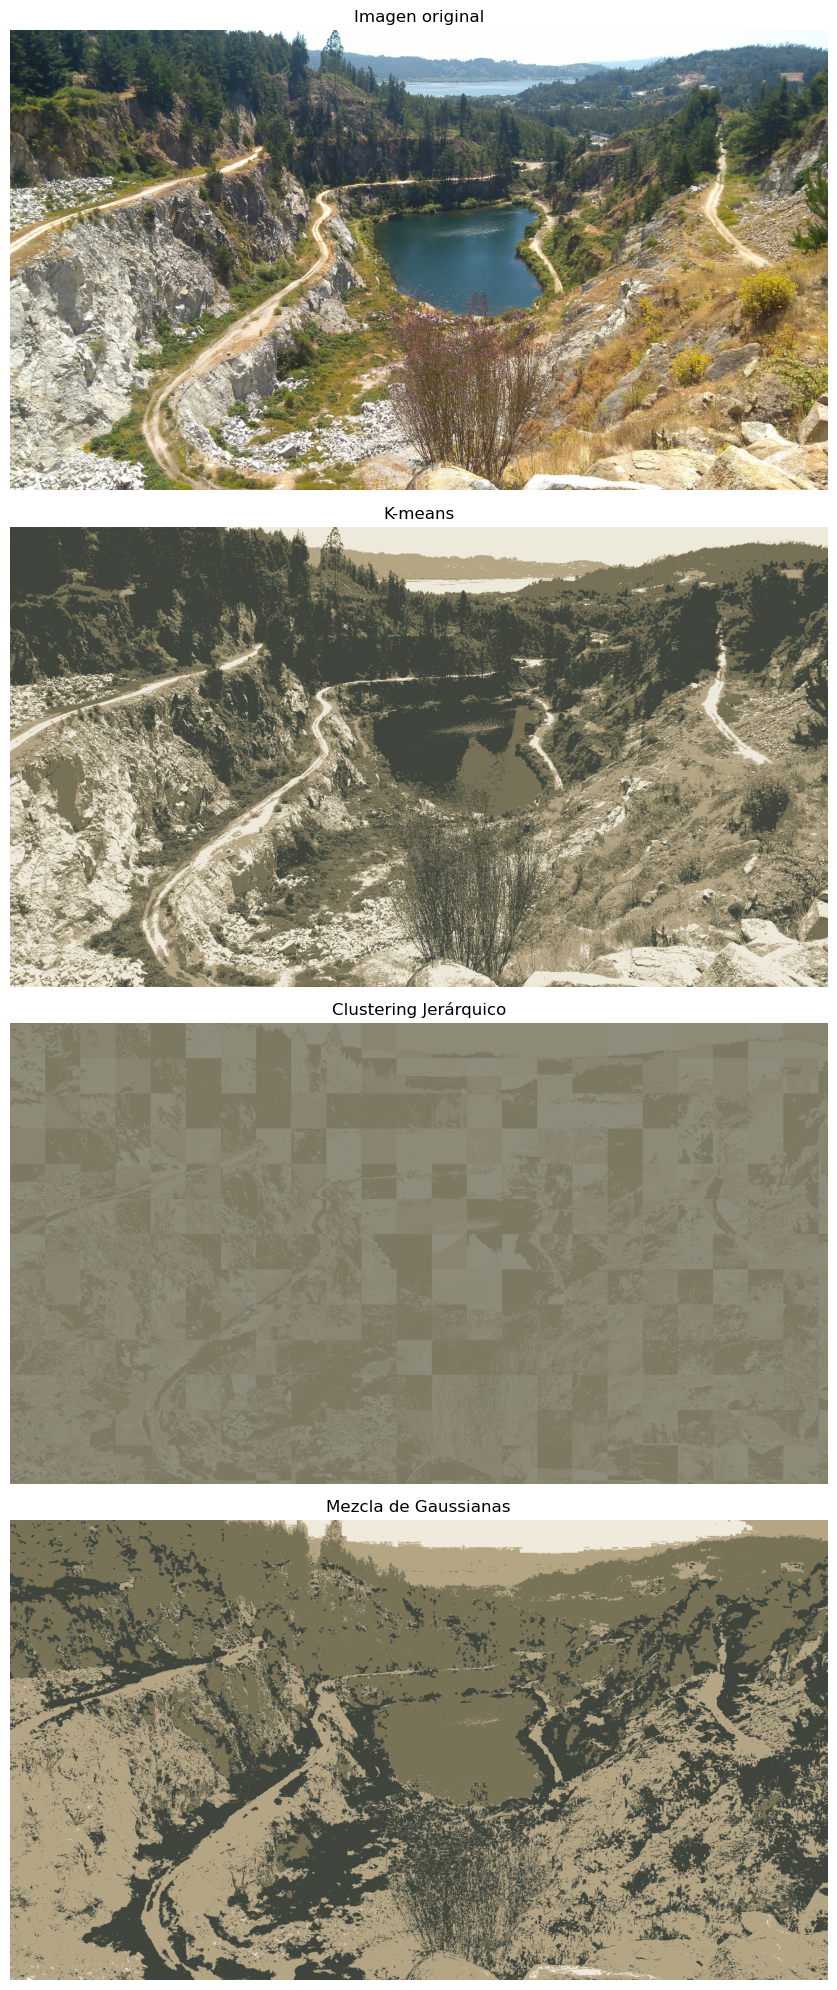

In [255]:
fig, axes = plt.subplots(4, 1, figsize=(20,20), dpi=100)

axes[0].imshow(image)
axes[0].axis('off')
axes[0].set_title('Imagen original')

axes[1].imshow(Kmeans_imagen)
axes[1].axis('off')
axes[1].set_title('K-means')

axes[2].imshow(cluster_jeraquico_imagen)
axes[2].axis('off')
axes[2].set_title('Clustering Jerárquico')

axes[3].imshow(gmm_imagen)
axes[3].axis('off')
axes[3].set_title('Mezcla de Gaussianas')

fig.tight_layout()

### Conclusiones

A lo largo del desarrollo del laboratorio se logro implementar tres algoritmos no supervisados, que por su naturaleza, no poseen metricas que permitan la comparación en terminos cuantitativos para determinar cual fue más optimo en el objetivo de analizar una imagen mediante la segmentación de colores, si se puede comentar que:


- En terminos de rendimiento KMeans es el algoritmo más rapido de implementar.
- Los cluster jerarquico requieren una amplia memoria, por ende, fue requerido segmentar el analisis en bloques.
- GMM se pierden los "bordes" de los pixeles por que se suavizan

En conclusión, para el objetivo se considera que visualmente KMeans logro desempeñar mejor el objetivo de investigación, y si se ajustase a más numero de clusters, es capaz de analizar y reconstruir la imagen mas simil a la original